# How to use OtrisymNMF for community detection

First, import the OtrisymNMF package.

In [1]:
import OtrisymNMF

and other useful libraries

In [2]:
import networkx as nx
import matplotlib.pylab as pl
import numpy as np
from sklearn.metrics import normalized_mutual_info_score as NMI

## First Example Karate club network

The Zachary's Karate Club network is a commonly used benchmark for evaluating community detection algorithms. The network represents the social interactions among the 34 members of a karate club at an American university. Following an internal conflict, the club split into two distinct factions.


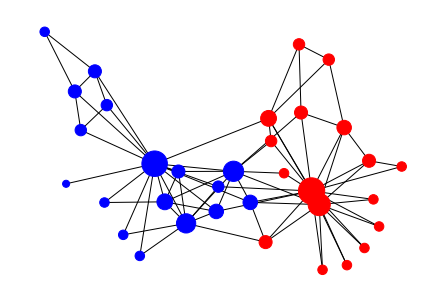

In [3]:
# Reading and displaying the graph
graph = nx.karate_club_graph()
club_labels = {node: 1 if graph.nodes[node]['club'] == 'Mr. Hi' else 0 for node in graph.nodes}
club_vector = np.array([club_labels[node] for node in sorted(graph.nodes)])
position = nx.spring_layout(graph,seed=23)
node_sizes = [10+graph.degree(node) * 40 for node in graph]  # Facteur d'échelle pour bien voir les tailles
nx.draw(graph, position, node_color=['r' if club_vector[node] == 0 else 'b' for node in graph],node_size=node_sizes)
pl.show()

Let's use the OtrisymNMF factorization of the adjacency matrix of graph X with r = 2 to detect the 2 communities in the network.
- v is a vector that gives the community index for each node.
- w indicates the importance of a node within its community.
- S describes interactions between the r communities.

In [4]:
X = nx.adjacency_matrix(graph, nodelist=sorted(graph.nodes))
w, v, S, error = OtrisymNMF.OtrisymNMF_CD(X, 2,numTrials=10,verbosity=0)

To compare the partition found by OtrisymNMF with the ground truth partition, we calculate the NMI. We also display the partition obtained by OtrisymNMF. It can be observed that only one node was misclassified—the same node that is misclassified by other community detection methods.

NMI score: 0.8371694628777809


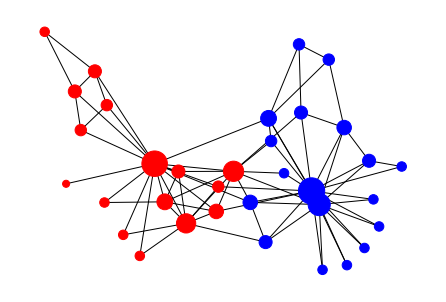

In [5]:
print("NMI score:",NMI(club_vector,v))
nx.draw(graph, position, node_color=['r' if v[node] == 1 else 'b' for node in graph],node_size=node_sizes)
pl.show()

## Second example Dolphins Network


NMI score: 0.8141131499687286


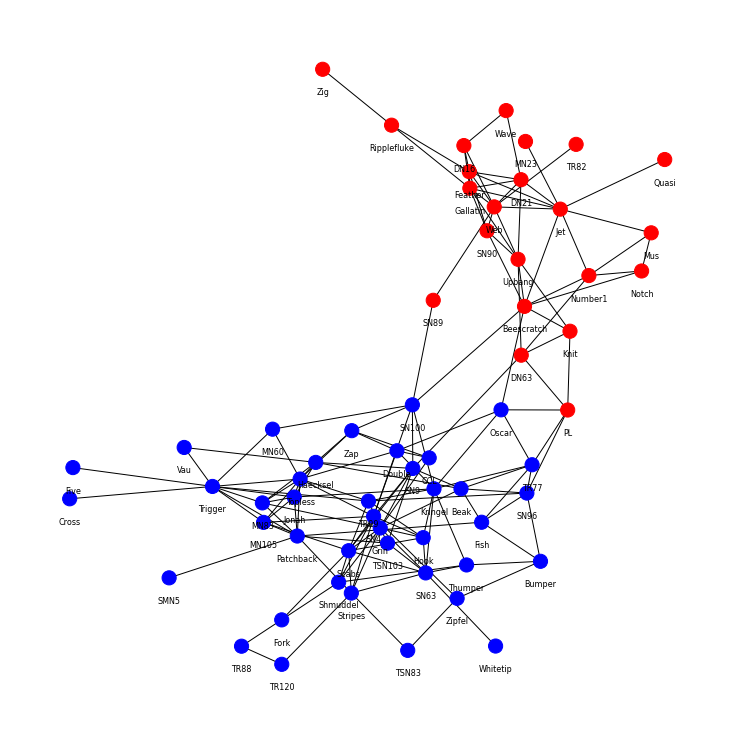

In [6]:

file_path = "Data/dolphins.net"

graph = nx.read_pajek(file_path)
graph = nx.Graph(graph)
labels = graph.nodes
clusters = np.ones(len(labels), dtype=int)
group2 = [60, 32, 56, 22, 5, 9, 6, 31, 13, 17, 25, 48, 57, 41, 54, 27, 26, 1, 19, 7]
clusters[group2] = 0

X = nx.adjacency_matrix(graph)
w, v, S, error = OtrisymNMF.OtrisymNMF_CD(X, 2,numTrials=10,verbosity=0)

print("NMI score:",NMI(clusters,v))
position = nx.spring_layout(graph,seed=10)
pl.figure(figsize=(10, 10))  # Ajustez les dimensions selon vos besoins
nx.draw(graph, position, node_color=['r' if v[node] == 0 else 'b' for node in range(len(graph.nodes))],with_labels=False,node_size=200)
label_pos = {node: (x, y - 0.08) for node, (x, y) in position.items()}  # Déplacement des labels vers le bas

nx.draw_networkx_labels(
    graph,
    label_pos,
    labels={node: str(node) for node in graph.nodes},
    font_size=8,               # Taille de police plus petite
    verticalalignment='bottom'  # Placer les étiquettes en dessous
)
pl.show()




